In [1]:
import xarray as xr
path = "results_GBAU/GBAU.nc"
ds = xr.open_dataset(path)
display(ds)

<xarray.Dataset> Size: 55kB
Dimensions:        (ac: 2, time: 161)
Coordinates:
  * time           (time) int64 1kB 1940 1941 1942 1943 ... 2097 2098 2099 2100
  * ac             (ac) <U7 56B 'DEFAULT' 'TOTAL'
Data variables: (12/21)
    emis_CO2       (ac, time) float64 3kB ...
    emis_distance  (ac, time) float64 3kB ...
    emis_H2O       (ac, time) float64 3kB ...
    emis_NOx       (ac, time) float64 3kB ...
    conc_CH4       (ac, time) float64 3kB ...
    conc_CO2       (ac, time) float64 3kB ...
    ...             ...
    dT_CO2         (ac, time) float64 3kB ...
    dT_cont        (ac, time) float64 3kB ...
    dT_H2O         (ac, time) float64 3kB ...
    dT_O3          (ac, time) float64 3kB ...
    dT_PMO         (ac, time) float64 3kB ...
    dT_SWV         (ac, time) float64 3kB ...
Attributes:
    title:        GBAU
    created:      2025-11-18 11:56:22
    user:         atzeh
    oac version:  0.11.1

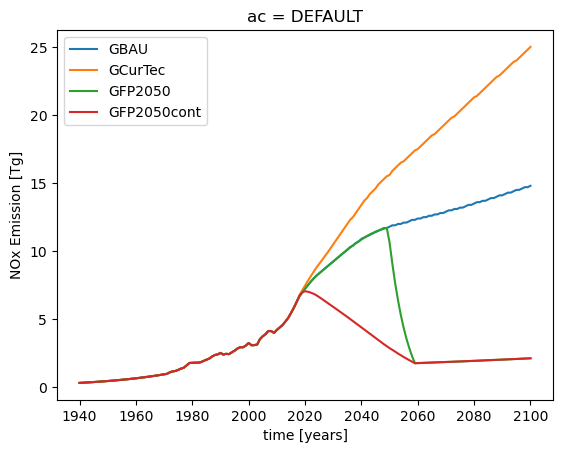

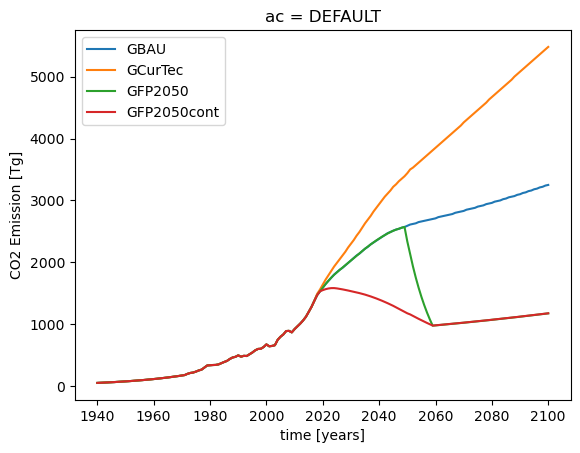

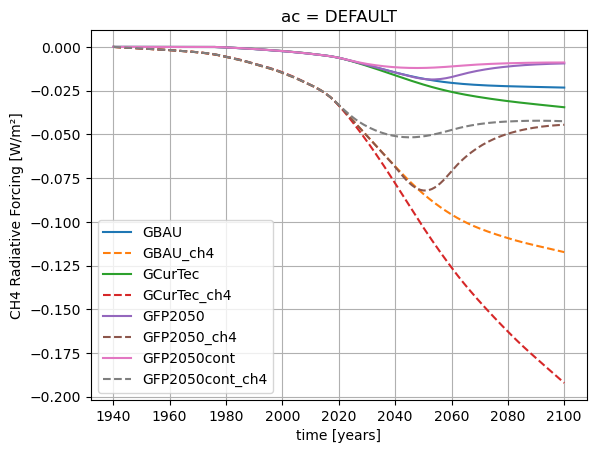

[0.32522458 0.33671346 0.34865306 0.36106057 0.37395382 0.38735133
 0.4012723  0.41573667 0.43076512 0.44637911 0.46260087 0.47945349
 0.49696089 0.51514787 0.53404015 0.55366437 0.57404816 0.59522011
 0.61720987 0.64004816 0.66376677 0.68839863 0.71397782 0.74053965
 0.76812064 0.79675859 0.8264926  0.85736313 0.88941202 0.92268253
 0.95721939 0.99306883 1.09959221 1.17232827 1.20387189 1.2832697
 1.37678523 1.4428311  1.61595006 1.79121314 1.80117909 1.81152322
 1.80950923 1.84551474 1.93986336 2.0308194  2.11117184 2.26113047
 2.37443531 2.41775441 2.52608773 2.40802438 2.46364343 2.43569284
 2.56789852 2.68957987 2.84683205 2.94664365 2.94442736 3.06631835
 3.25643191 3.09294915 3.10307453 3.14005929 3.53990646 3.75405343
 3.90631817 4.13872375 4.13173596 3.99653672 4.21730509 4.39315439
 4.56776376 4.82489373 5.09139031 5.44998569 5.82748657 6.26253923
 6.69353969 6.97300492 7.05943938 7.02118455 6.95990851 6.87504167
 6.76628974 6.63365885 6.49164095 6.34783956 6.20244568 6.05565

In [2]:
import matplotlib.pyplot as plt
for scenario in ["GBAU", "GCurTec", "GFP2050", "GFP2050cont"]:
    ds_p = f"results_{scenario}/{scenario}.nc"
    ds = xr.open_dataset(ds_p)
    plt.figure('NOx')
    ds['emis_NOx'][0].plot(x="time", label=scenario)
    plt.legend()
    plt.figure('Co2')
    ds['emis_CO2'][0].plot(x="time", label=scenario)
    plt.legend()
    plt.figure('SWV')
    ds['RF_SWV'][0].plot(x="time", label=scenario)
    ds['RF_CH4'][0].plot(x="time", label=scenario + '_ch4', linestyle='--')
    plt.legend()
plt.grid()
plt.show()
print(ds['emis_NOx'][0].values)



In [3]:
print(ds['emis_CO2'][0][2019-1940].values)
print(ds['emis_NOx'][0][2019-1940].values)


1531.1353463036887
6.973004921064569


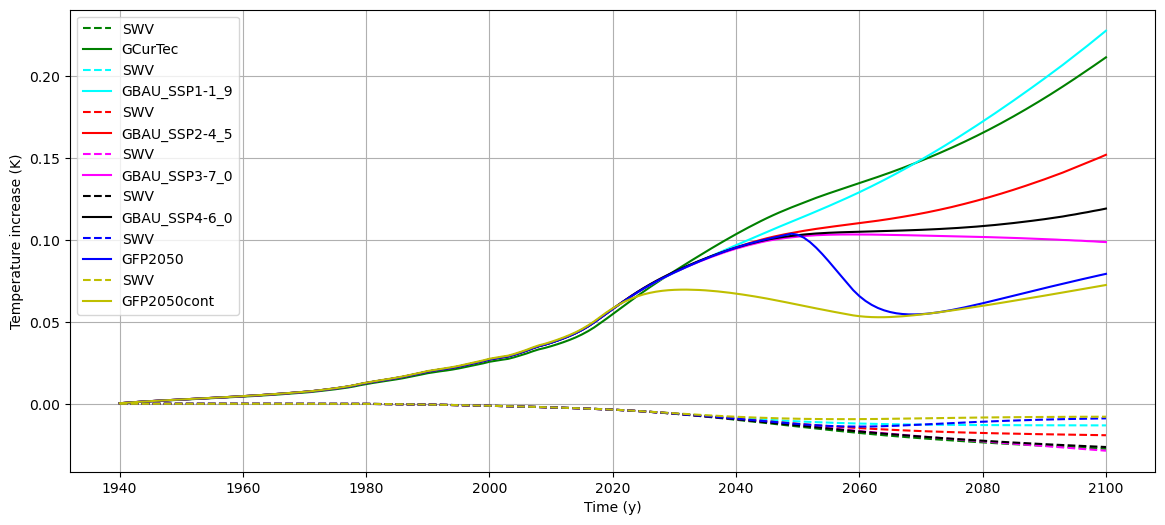

In [4]:
# Fig 2:
import numpy as np
scenarios = ["GCurTec","GBAU_SSP1-1_9",
    "GBAU_SSP2-4_5",
    "GBAU_SSP3-7_0",
    "GBAU_SSP4-6_0", "GFP2050", "GFP2050cont"]
components = {
    "cont": [],
    "O3": [],
    "H2O": [],
    "CO2": [],
    "PMO": [],
    "CH4": [],
    "SWV":[],
}

color_dict ={"GCurTec": 'g',
             "GBAU_SSP1-1_9": (0,1,1),
            "GBAU_SSP2-4_5":(1,0,0),
            "GBAU_SSP3-7_0": (1,0,1),
            "GBAU_SSP4-6_0": (0,0,0),
            "GFP2050": 'b', 
            "GFP2050cont": 'y'}
plt.figure(figsize=(14, 6))
for scenario in scenarios:
    # if scenario != "GCurTec":
    #     continue
    ds_p = f"results_{scenario}/{scenario}.nc"
    ds = xr.open_dataset(ds_p)
    dT_data = np.zeros(len(ds['time']))
    # print(dT_data)
    for component in components.keys():
        # if component == 'SWV':
        #     plt.plot(ds['time'], ds['dT_'+component][0].values, linestyle='--', label=component, color=color_dict[scenario])

        if component == 'SWV':
            dT_data = dT_data + ds['dT_'+component][0].values # TODO why does the contrail module screws everything?
            plt.plot(ds['time'], ds['dT_'+component][0].values, linestyle='--', label=component, color=color_dict[scenario])
            continue
        dT_data = dT_data + ds['dT_'+component][0].values
        # plt.plot(ds['time'], ds['dT_'+component][0].values, linestyle='--', label=component,)# color=color_dict[scenario])

        # plt.plot(ds['time'], ds['dT_'+component][0].values, linestyle='--', label=component)
        # components[component].append(ds['dT_'+component][0].values)
    # print(dT_data)
    plt.plot(ds['time'], dT_data, label=scenario, color=color_dict[scenario])
plt.grid()
plt.legend()
# plt.xlim([2000,2100])
plt.ylabel("Temperature increase (K)")
plt.xlabel("Time (y)")
plt.show()

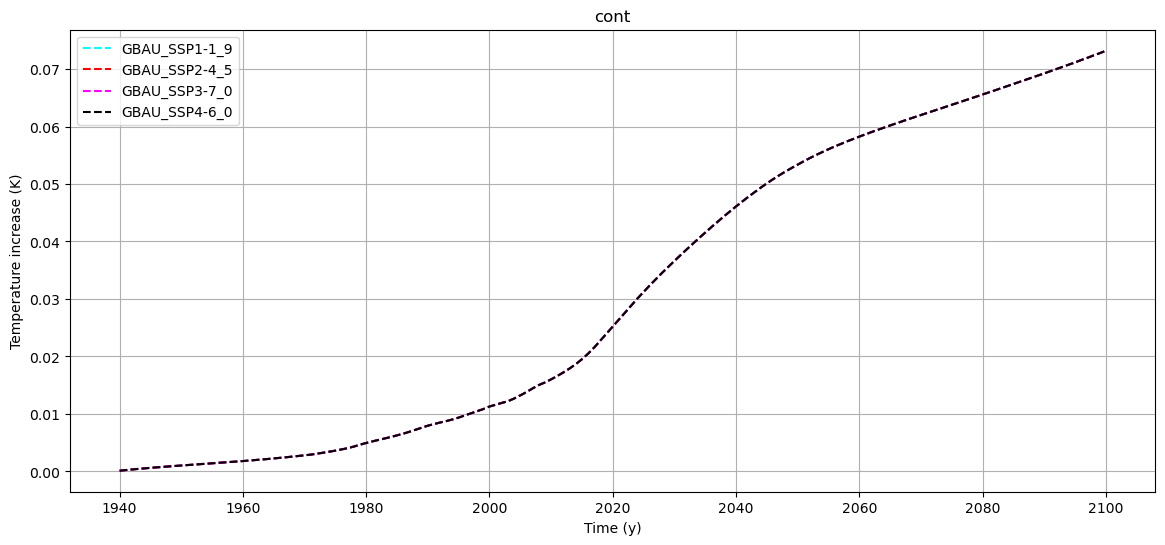

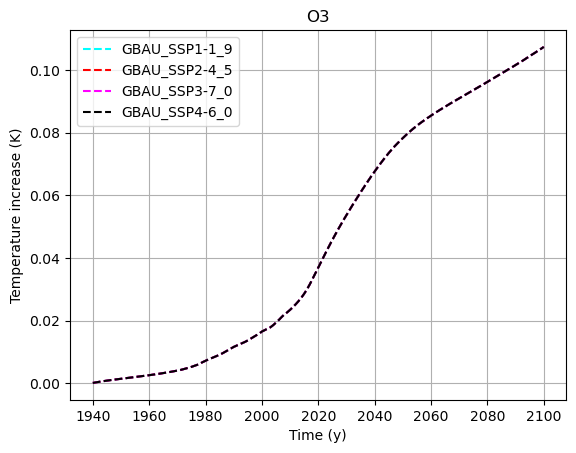

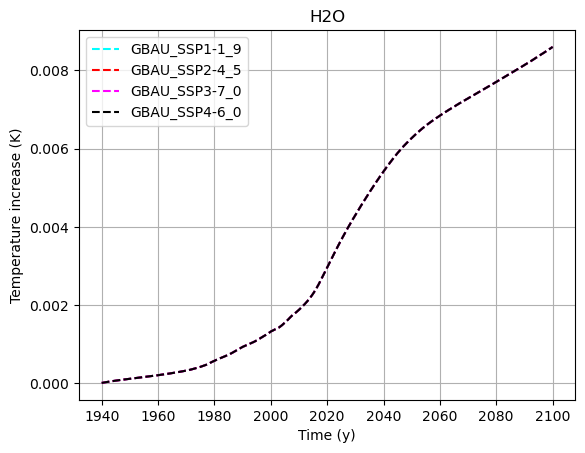

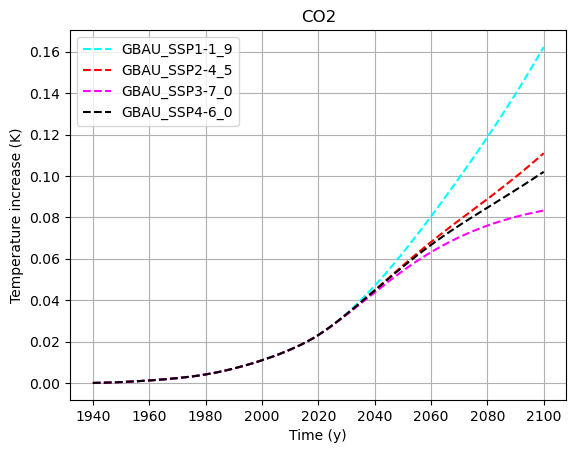

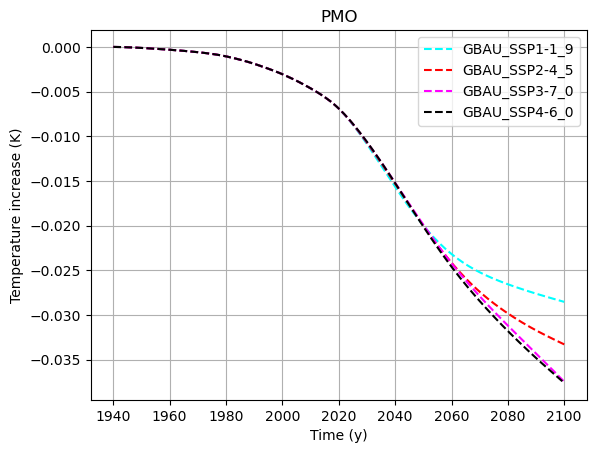

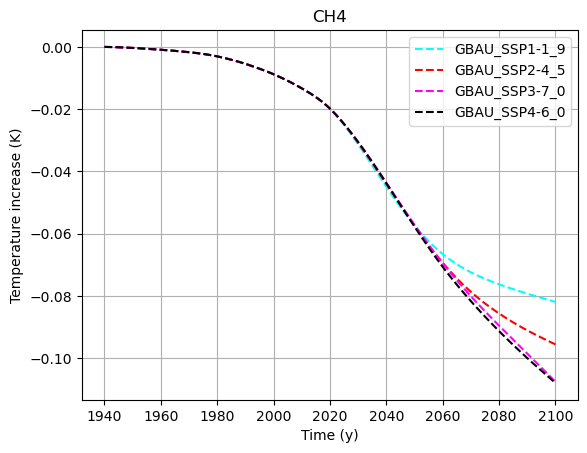

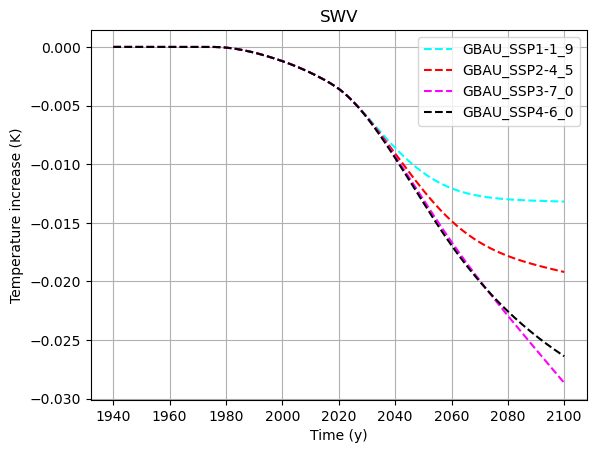

In [5]:
# Fig 2:
import numpy as np
scenarios = ["GBAU_SSP1-1_9",
    "GBAU_SSP2-4_5",
    "GBAU_SSP3-7_0",
    "GBAU_SSP4-6_0"]
components = {
    "cont": [],
    "O3": [],
    "H2O": [],
    "CO2": [],
    "PMO": [],
    "CH4": [],
    "SWV":[],
}

color_dict ={"GCurTec": 'g',
             "GBAU_SSP1-1_9": (0,1,1),
            "GBAU_SSP2-4_5":(1,0,0),
            "GBAU_SSP3-7_0": (1,0,1),
            "GBAU_SSP4-6_0": (0,0,0),
            "GFP2050": 'b', 
            "GFP2050cont": 'y'}
plt.figure(figsize=(14, 6))
for component in components.keys():

    # if scenario != "GCurTec":
    #     continue

    # print(dT_data)
    for scenario in scenarios:
        ds_p = f"results_{scenario}/{scenario}.nc"
        ds = xr.open_dataset(ds_p)
        dT_data = np.zeros(len(ds['time']))
        dT_data = dT_data + ds['dT_'+component][0].values # TODO why does the contrail module screws everything?
        plt.plot(ds['time'], ds['dT_'+component][0].values, linestyle='--', label=scenario, color=color_dict[scenario])

    # print(dT_data)
    # plt.plot(ds['time'], dT_data, label=scenario, color=color_dict[scenario])
    plt.grid()
    plt.legend()
    # plt.xlim([2000,2100])
    plt.title(component)
    plt.ylabel("Temperature increase (K)")
    plt.xlabel("Time (y)")
    plt.show()

GCurTec 151.83254352957618
GBAU_SSP1-1_9 162.30240296486053
GBAU_SSP2-4_5 110.95874527214174
GBAU_SSP3-7_0 83.28309988671862
GBAU_SSP4-6_0 101.97970413187205
GFP2050 70.23756291290182
GFP2050cont 58.358150050839555


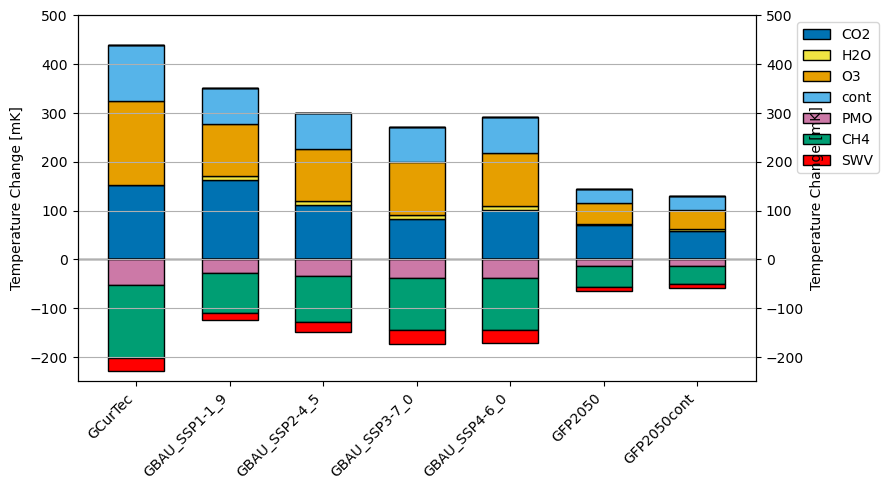

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Example categories (x-axis groups)
scenarios = ["GCurTec","GBAU_SSP1-1_9",
    "GBAU_SSP2-4_5",
    "GBAU_SSP3-7_0",
    "GBAU_SSP4-6_0", "GFP2050", "GFP2050cont"]
# Example data for each component (each color represents one layer in the stack)
components = {
    "CO2": [],
    "H2O": [],
    "O3": [],
    "cont": [],
    "PMO": [],
    "CH4": [],
    "SWV":[],
}
for scenario in scenarios:
    ds_p = f"results_{scenario}/{scenario}.nc"
    ds = xr.open_dataset(ds_p)
    for component in components.keys():
        components[component].append(ds['dT_'+component][0].values[-1]*1000)
        if component == 'CO2':
            print(scenario, ds['dT_'+component][0].values[-1]*1000)
    # print(components)    
    
# raise ValueError
# Colors for each component
colors = {
    "cont": "#56B4E9",
    "O3": "#E69F00",
    "H2O": "#F0E442",
    "CO2": "#0072B2",
    "PMO": "#CC79A7",
    "CH4": "#009E73",
    "SWV": "red"
}

x = np.arange(len(scenarios))
width = 0.6

# Initialize the bottom of the bars at zero
bottom = np.zeros(len(scenarios))

fig, ax1 = plt.subplots(figsize=(9,5))

# Initialize separate accumulators for positive and negative stacks
pos_bottom = np.zeros(len(scenarios))
neg_bottom = np.zeros(len(scenarios))

for name, values in components.items():
    # if name == 'cont':
    #    continue 
    values = np.array(values)
    
    pos = np.where(values > 0, values, 0)
    neg = np.where(values < 0, values, 0)

    # Positive values stacked upward
    ax1.bar(x, pos, width, bottom=pos_bottom, color=colors[name], label=name, edgecolor="black")
    pos_bottom += pos

    # Negative values stacked downward
    ax1.bar(x, neg, width, bottom=neg_bottom, color=colors[name], edgecolor="black")
    neg_bottom += neg

# Draw zero line
ax1.axhline(0, color="black", linewidth=1)

# Axis setup
ax1.set_xticks(x)
ax1.set_xticklabels(scenarios, rotation=45, ha="right")
ax1.set_ylabel("Temperature Change [mK]")
ax1.set_ylim(-250, 500)

# Secondary y-axis
ax2 = ax1.twinx()
ax2.set_ylabel("Temperature Change [mK]")
ax2.set_ylim(-250, 500)

# Legend outside plot
ax1.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.grid()
plt.show()

In [7]:
components

{'CO2': [np.float64(151.83254352957618),
  np.float64(162.30240296486053),
  np.float64(110.95874527214174),
  np.float64(83.28309988671862),
  np.float64(101.97970413187205),
  np.float64(70.23756291290182),
  np.float64(58.358150050839555)],
 'H2O': [np.float64(1.3907401130651287e-08),
  np.float64(8.594048541371851),
  np.float64(8.594048541371851),
  np.float64(8.594048541371851),
  np.float64(8.594048541371851),
  np.float64(3.340334575337012),
  np.float64(3.2452542041907857)],
 'O3': [np.float64(173.60522238373295),
  np.float64(107.34378605091959),
  np.float64(107.34378605091959),
  np.float64(107.34378605091959),
  np.float64(107.34378605091959),
  np.float64(41.72925701404535),
  np.float64(40.48396519686838)],
 'cont': [np.float64(114.71366613962425),
  np.float64(73.18318706434668),
  np.float64(73.18318706434668),
  np.float64(73.18318706434668),
  np.float64(73.18318706434668),
  np.float64(28.444839345225688),
  np.float64(28.306476001034536)],
 'PMO': [np.float64(-51.9

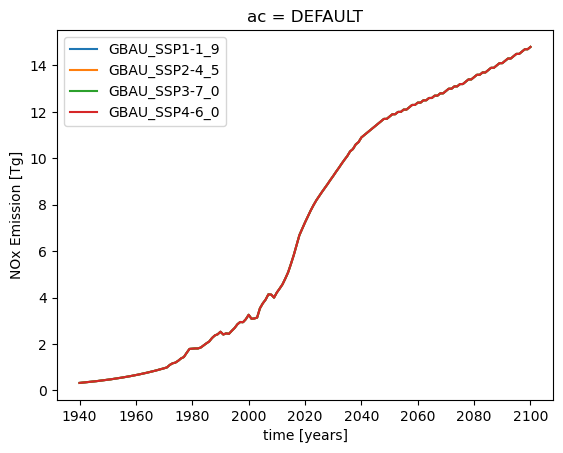

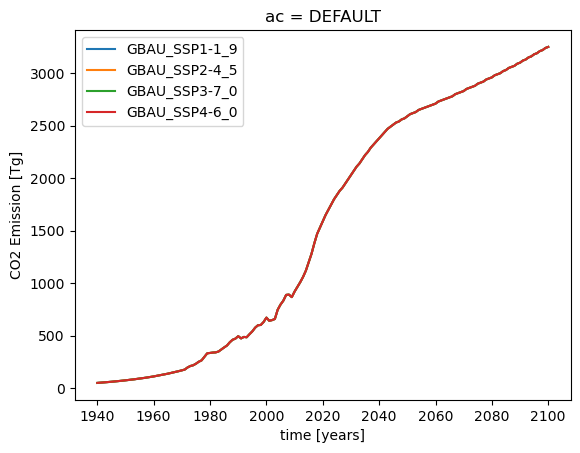

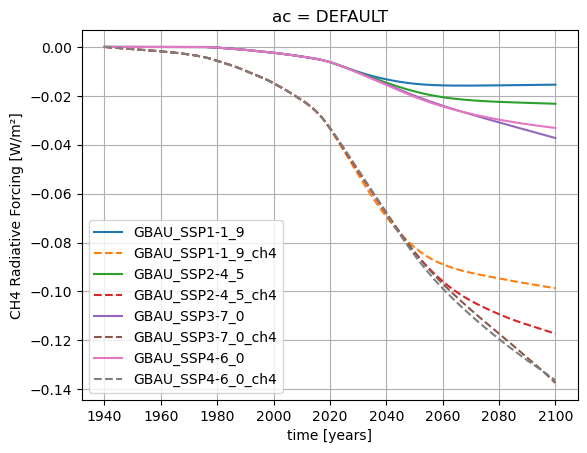

[ 0.325  0.337  0.349  0.361  0.374  0.387  0.401  0.416  0.431  0.446
  0.463  0.479  0.497  0.515  0.534  0.554  0.574  0.595  0.617  0.64
  0.664  0.688  0.714  0.741  0.768  0.797  0.826  0.857  0.889  0.923
  0.957  0.993  1.1    1.17   1.2    1.28   1.38   1.44   1.62   1.79
  1.8    1.81   1.81   1.85   1.94   2.03   2.11   2.26   2.37   2.42
  2.53   2.41   2.46   2.44   2.57   2.69   2.85   2.95   2.94   3.07
  3.26   3.09   3.1    3.14   3.54   3.75   3.91   4.14   4.13   4.
  4.22   4.39   4.57   4.82   5.09   5.45   5.83   6.26   6.69   6.97
  7.24   7.5    7.75   7.98   8.19   8.37   8.55   8.72   8.89   9.07
  9.24   9.42   9.59   9.77   9.94  10.1   10.3   10.4   10.6   10.7
 10.9   11.    11.1   11.2   11.3   11.4   11.5   11.6   11.7   11.7
 11.8   11.9   11.9   12.    12.    12.1   12.1   12.2   12.3   12.3
 12.4   12.4   12.5   12.5   12.6   12.6   12.7   12.7   12.8   12.8
 12.9   13.    13.    13.1   13.1   13.2   13.2   13.3   13.4   13.4
 13.5   13.6   13.6   13.

In [8]:
import matplotlib.pyplot as plt
import xarray as xr
for scenario in [
    "GBAU_SSP1-1_9",
    "GBAU_SSP2-4_5",
    "GBAU_SSP3-7_0",
    "GBAU_SSP4-6_0",]:
    
    ds_p = f"results_{scenario}/{scenario}.nc"
    ds = xr.open_dataset(ds_p)
    plt.figure('NOx')
    ds['emis_NOx'][0].plot(x="time", label=scenario)
    plt.legend()
    plt.figure('Co2')
    ds['emis_CO2'][0].plot(x="time", label=scenario)
    plt.legend()
    plt.figure('SWV')
    ds['RF_SWV'][0].plot(x="time", label=scenario)
    ds['RF_CH4'][0].plot(x="time", label=scenario + '_ch4', linestyle='--')
    plt.legend()
plt.grid()
plt.show()
print(ds['emis_NOx'][0].values)


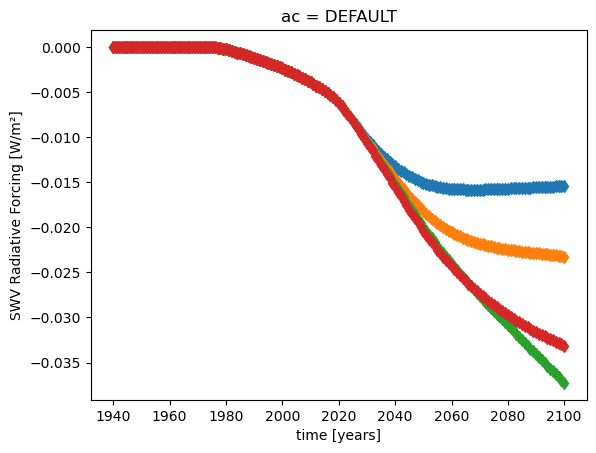

In [9]:
import matplotlib.pyplot as plt
import xarray as xr
storage = {}
for scenario in [
    "GBAU_SSP1-1_9",
    "GBAU_SSP2-4_5",
    "GBAU_SSP3-7_0",
    "GBAU_SSP4-6_0",]:
    ds_p = f"results_{scenario}/{scenario}.nc"
    ds = xr.open_dataset(ds_p)
    ds['RF_SWV'][0].plot(x="time", label=scenario + '_swv', linestyle='--', marker='d')
    storage[scenario] = ds['RF_SWV'][0].values
plt.show()

In [10]:
storage

{'GBAU_SSP1-1_9': array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -4.44738712e-05, -9.56537779e-05, -1.51498380e-04, -2.14067905e-04,
        -2.85487561e-04, -3.65534027e-04, -4.51143543e-04, -5.39935841e-04,
        -6.30261254e-04, -7.21198500e-04, -8.12552178e-04, -9.04850137e-04,
        -9.99340776e-04, -1.09793556e-03, -1.20258555e-03, -1.31414193e

In [11]:
storage["GBAU_SSP1-1_9"]-storage["GBAU_SSP2-4_5"]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [12]:
ppp = r"C:\Users\atzeh\PycharmProjects\OAC_Thesis\repository\co2_bg.nc"
hhh =r"C:\Users\atzeh\PycharmProjects\OAC_Thesis\repository\h2\SSP_scenarios\bg_ssp126.nc"
import xarray as xr
co2_bg = xr.load_dataset(ppp)
co2_bg
# co = xr.load_dataset(hhh)
# co

<xarray.Dataset> Size: 1kB
Dimensions:   (year: 31)
Coordinates:
  * year      (year) int64 248B 1850 1950 2000 2010 2015 ... 2220 2230 2240 2250
Data variables:
    SSP1-1.9  (year) float64 248B 284.3 312.8 369.1 388.7 ... 343.6 343.5 343.3
    SSP2-4.5  (year) float64 248B 284.3 312.8 369.1 388.7 ... 642.1 640.0 637.0
    SSP3-7.0  (year) float64 248B 284.3 312.8 369.1 ... 1.516e+03 1.514e+03
    SSP4-6.0  (year) float64 248B 284.3 312.8 369.1 388.7 ... 790.2 789.0 786.2
    SSP5-8.5  (year) float64 248B 284.3 312.8 369.1 ... 2.209e+03 2.206e+03
Attributes:
    Title:      CO2 background scenarios
    long_name:  CO2 concentration
    units:      ppm
    Reference:  Meinshausen, M., Nicholls, Z. R., Lewis, J., Gidden, M. J., V...
    URL:        https://doi.org/10.5194/gmd-13-3571-2020